In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [114]:
#load
df = pd.read_csv('Dataset.csv')

In [115]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,'C1760492708','1','F','28007','M1823072687','28007','es_transportation',52.35,0
1,172,'C1222389110','3','M','28007','M1823072687','28007','es_transportation',14.75,0
2,106,'C879949041','3','F','28007','M1823072687','28007','es_transportation',3.73,0
3,86,'C409740988','5','M','28007','M1823072687','28007','es_transportation',61.42,0
4,152,'C671449181','3','F','28007','M692898500','28007','es_health',9.05,0


In [116]:
#Remove single quotes from string columns
string_cols = df.columns[df.dtypes == 'object']
df[string_cols] = df[string_cols].apply(lambda col: np.char.replace(col.values.astype(str), "'", ""))

# Remove 'es_' from 'category' column
df['category'] = df['category'].str.replace('es_', '', regex=False) 

# Convert 'age', 'zipcodeOri', and 'zipMerchant' to numeric, handling errors
cols = ['age', 'zipcodeOri', 'zipMerchant']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce').astype('Int64') 

df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,C1760492708,1,F,28007,M1823072687,28007,transportation,52.35,0
1,172,C1222389110,3,M,28007,M1823072687,28007,transportation,14.75,0
2,106,C879949041,3,F,28007,M1823072687,28007,transportation,3.73,0
3,86,C409740988,5,M,28007,M1823072687,28007,transportation,61.42,0
4,152,C671449181,3,F,28007,M692898500,28007,health,9.05,0


In [117]:
# Convert 'E' in gender to a new category 'Unknown'
df['gender'] = df['gender'].replace('E', 'Unknown')

In [118]:
#Class Imbalance 
print("Fraud Class Distribution:")
print(df['fraud'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

Fraud Class Distribution:
fraud
0    98.79%
1     1.21%
Name: proportion, dtype: object


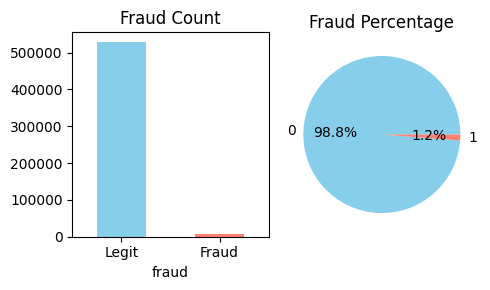

In [119]:
#Fraud count vizualization
plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1)
df['fraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Fraud Count')
plt.xticks([0, 1], ['Legit', 'Fraud'], rotation=0)

plt.subplot(1, 2, 2)
df['fraud'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', 
                                            colors=['skyblue', 'salmon'])
plt.title('Fraud Percentage')
plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\Kolluri Sruthi\AppData\Local\Temp\ipykernel_2268\3965220049.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='viridis')
C:\Users\Kolluri Sruthi\AppData\Local\Temp\ipykernel_2268\3965220049.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='viridis')
C:\Users\Kolluri Sruthi\AppData\Local\Temp\ipykernel_2268\3965220049.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='viridis')


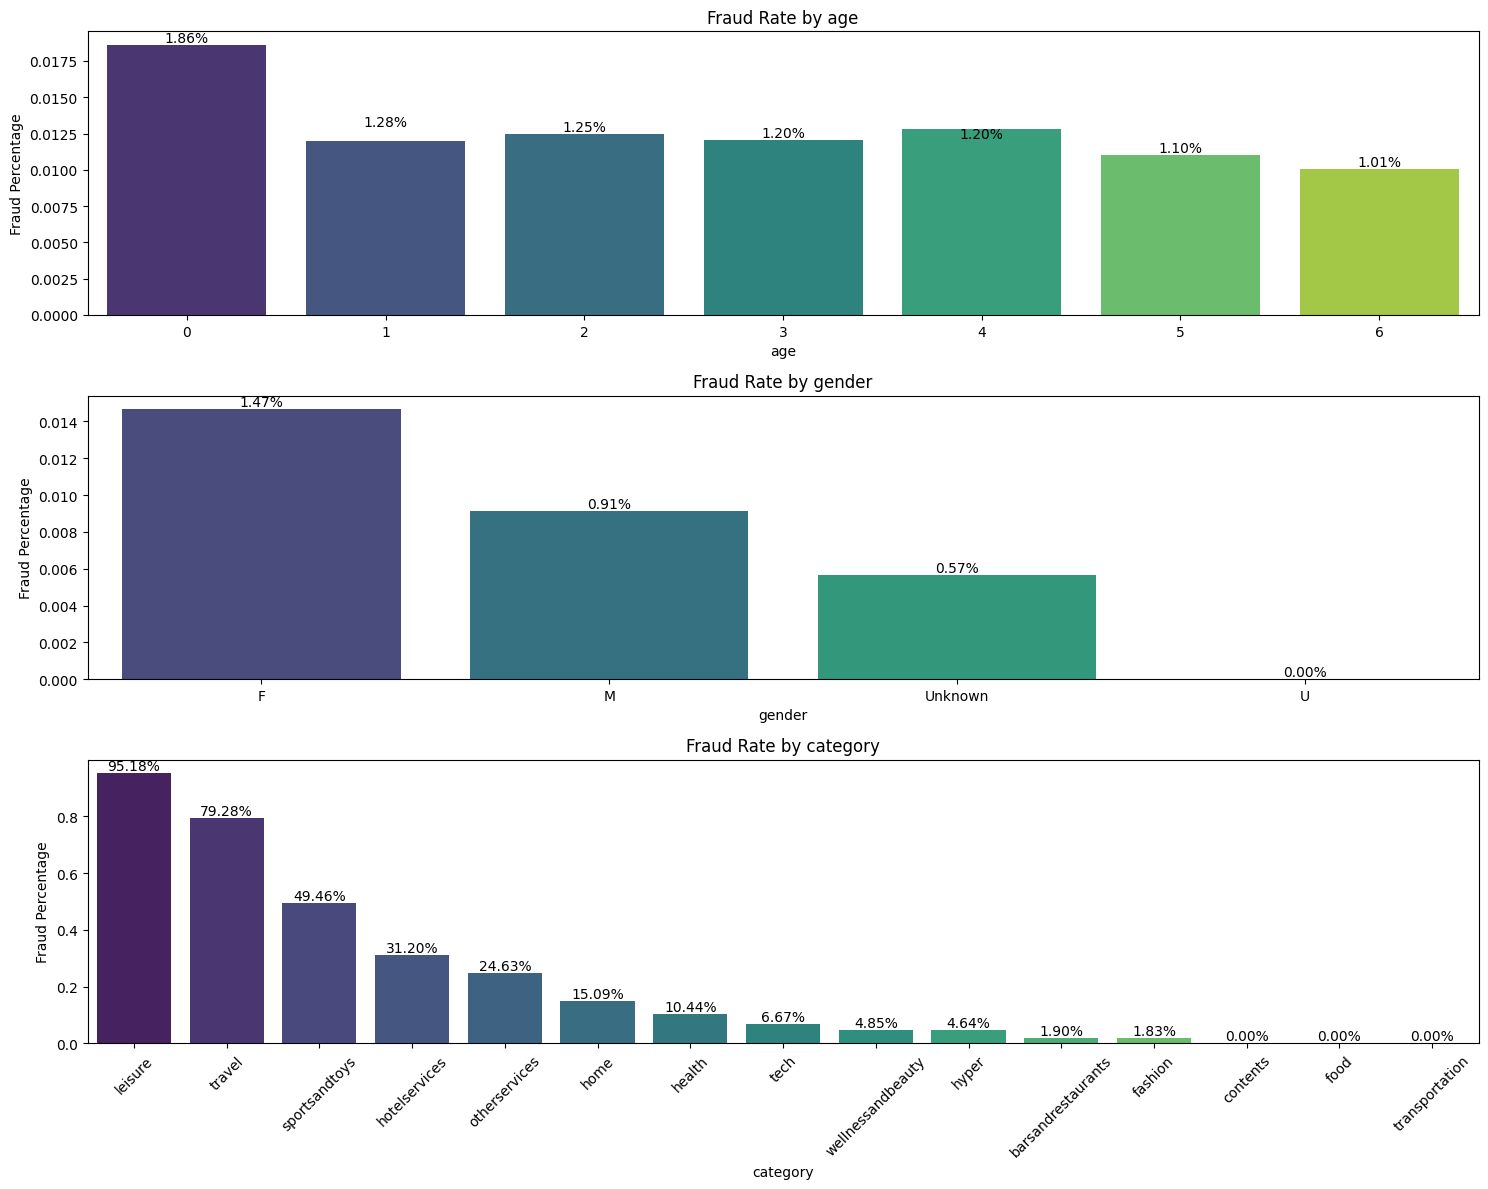

In [120]:
# Categorical Variables Analysis
cat_vars = ['age', 'gender', 'category']

plt.figure(figsize=(15, 12))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(3, 1, i)
    
    # Calculate fraud rate per category
    fraud_rate = df.groupby(var)['fraud'].mean().sort_values(ascending=False)
    
    # Plot
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='viridis')
    plt.title(f'Fraud Rate by {var}')
    plt.ylabel('Fraud Percentage')
    plt.xticks(rotation=45 if var == 'category' else 0)
    
    # Add value labels
    for index, value in enumerate(fraud_rate.values):
        plt.text(index, value, f"{value:.2%}", ha='center', va='bottom')
        
plt.tight_layout()
plt.show()


Unknown Values Count:
age: 0 (0.00%)
gender: 0 (0.00%)


c:\Users\Kolluri Sruthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Kolluri Sruthi\AppData\Local\Temp\ipykernel_2268\3004871443.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(legit_amounts, label='Legitimate', color='blue', log_scale=True)


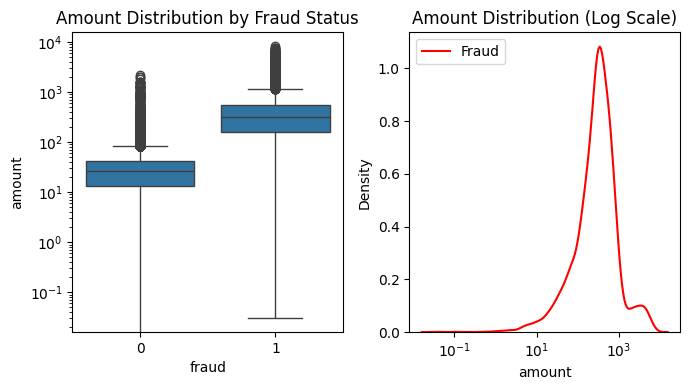

In [121]:
#Transaction Amount Analysis
unknown_data = {
    'age': df['age'].value_counts().get('U', 0),
    'gender': df['gender'].value_counts().get('E', 0)
}

print("\nUnknown Values Count:")
for k, v in unknown_data.items():
    print(f"{k}: {v} ({v/len(df):.2%})")

plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='fraud', y='amount', data=df)
plt.title('Amount Distribution by Fraud Status')
plt.yscale('log')  # Log scale for better visualization

plt.subplot(1, 2, 2)
fraud_amounts = df[df['fraud'] == 1]['amount']
legit_amounts = df[df['fraud'] == 0]['amount']

sns.kdeplot(legit_amounts, label='Legitimate', color='blue', log_scale=True)
sns.kdeplot(fraud_amounts, label='Fraud', color='red', log_scale=True)
plt.title('Amount Distribution (Log Scale)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Kolluri Sruthi\AppData\Local\Temp\ipykernel_2268\88374931.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day_part')['fraud'].mean().plot(kind='bar')


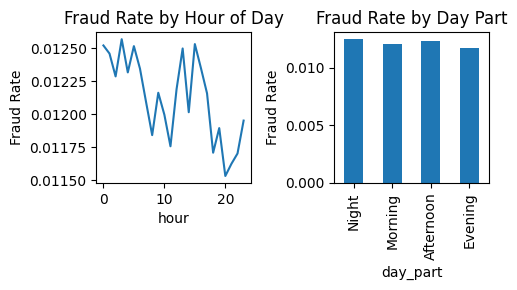

In [122]:
# Temporal Patterns Analysis
# Convert step to datetime-like sequence (assuming steps are hours)
df['datetime'] = pd.to_datetime(df['step'], unit='h')

# Time-based features
df['hour'] = df['datetime'].dt.hour
df['day_part'] = pd.cut(df['hour'], 
                       bins=[0, 6, 12, 18, 24],
                       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                       right=False)
# Plot fraud rate by time
plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1)
df.groupby('hour')['fraud'].mean().plot()
plt.title('Fraud Rate by Hour of Day')
plt.ylabel('Fraud Rate')

plt.subplot(1, 2, 2)
df.groupby('day_part')['fraud'].mean().plot(kind='bar')
plt.title('Fraud Rate by Day Part')
plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()


Top 5 Most Suspicious Customers:
             total_transactions  fraud_percentage
customer                                         
C910454738                   75          0.960000
C2004941826                 117          0.948718
C381007057                   90          0.911111
C1572610482                  92          0.880435
C617723960                   39          0.871795


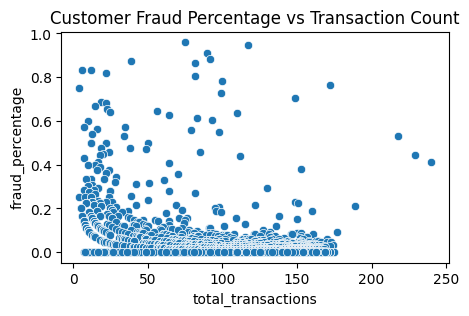

In [123]:
# Customer Behavior Analysis
customer_stats = df.groupby('customer').agg(
    total_transactions=('step', 'count'),
    fraud_percentage=('fraud', 'mean')
).sort_values('fraud_percentage', ascending=False)

print("\nTop 5 Most Suspicious Customers:")
print(customer_stats.head())

plt.figure(figsize=(5,3))
sns.scatterplot(x='total_transactions', y='fraud_percentage', data=customer_stats)
plt.title('Customer Fraud Percentage vs Transaction Count')
plt.show()



Top 5 Riskiest Merchants:
             transaction_count  fraud_percentage
merchant                                        
M1294758098                172          0.965116
M3697346                   284          0.943662
M1873032707                228          0.864035
M732195782                 559          0.849732
M980657600                1593          0.830508


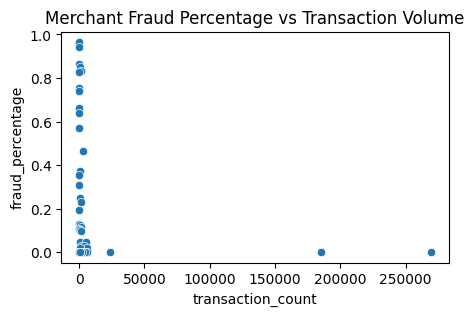

In [124]:
# Merchant Risk Analysis
merchant_stats = df.groupby('merchant').agg(
    transaction_count=('step', 'count'),
    fraud_percentage=('fraud', 'mean')
).sort_values('fraud_percentage', ascending=False)

print("\nTop 5 Riskiest Merchants:")
print(merchant_stats.head())

plt.figure(figsize=(5,3))
sns.scatterplot(x='transaction_count', y='fraud_percentage', data=merchant_stats)
plt.title('Merchant Fraud Percentage vs Transaction Volume')
plt.show()

**FEATURE ENGINEERING AND DATA PIPELINES**

In [125]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [126]:
df['age'] = df['age'].replace('U', np.nan).astype(float)
df['age'] = df['age'].fillna(df['age'].median()).astype(int)

# Verify
print("Age missing values:", df['age'].isna().sum())

Age missing values: 0


In [127]:
def safe_to_tensor(data):
    if hasattr(data, 'toarray'):
        data = data.toarray()
    data = np.nan_to_num(data.astype(np.float32))  #
    return torch.tensor(data)

In [131]:
def create_features(df):
    # Temporal features
    df = df.sort_values(['customer', 'step'])
    df['time_since_last'] = df.groupby('customer')['step'].diff().fillna(0)
    for i in range(1, 6):
        df[f'prev_amount_{i}'] = df.groupby('customer')['amount'].shift(i).fillna(0)
    
    # Graph proxy features
    merchant_fraud = df.groupby('merchant')['fraud'].mean().to_dict()
    df['merchant_fraud_rate'] = df['merchant'].map(merchant_fraud)
    user_fraud = df.groupby('customer')['fraud'].mean().to_dict()
    df['user_trust_score'] = 1 - df['customer'].map(user_fraud)
    
    # Transaction features
    df['location_mismatch'] = (df['zipcodeOri'] != df['zipMerchant']).astype(int)
    df['log_amount'] = np.log1p(df['amount'])
    
    # Time-based features
    df['hour'] = pd.to_datetime(df['step'], unit='h').dt.hour
    df['is_night'] = ((df['hour'] >= 0) & (df['hour'] <= 6)).astype(int)

    # Enhanced fraud-specific features
    df['age_risk'] = np.where(
        df['age'] < 25, 'high',
        np.where(df['age'] > 65, 'medium', 'low'))
    
    age_bins = pd.qcut(df['age'], q=5, duplicates='drop')  # Add duplicates='drop'
    merchant_age_risk = df.groupby(['merchant', age_bins])['fraud'].mean()
    
    df = df.merge(
        merchant_age_risk.rename('merchant_age_risk'),
        left_on=['merchant', age_bins],
        right_index=True,
        how='left'
    )
    
    return df
    


In [132]:
# Preprocess data 
df = create_features(df)
X = df.drop(columns=['fraud'])
y = df['fraud']

C:\Users\Kolluri Sruthi\AppData\Local\Temp\ipykernel_2268\2380315423.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merchant_age_risk = df.groupby(['merchant', age_bins])['fraud'].mean()


In [133]:
# Define feature groups 
temporal_features = ['time_since_last'] + [f'prev_amount_{i}' for i in range(1, 6)]
graph_features = ['merchant_fraud_rate', 'user_trust_score']
transaction_features = ['log_amount', 'location_mismatch', 'age', 'gender', 'category', 'is_night']
graph_features.extend(['merchant_age_risk'])  # Add to graph features
transaction_features.append('age_risk') 

In [134]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [135]:
# Preprocessing pipelines (unchanged)
temporal_pipeline = StandardScaler()
graph_pipeline = StandardScaler()
transaction_pipeline = ColumnTransformer([
    ('num', StandardScaler(), ['log_amount', 'age']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['gender', 'category']),
    ('bin', 'passthrough', ['location_mismatch', 'is_night'])
])

In [136]:
# Transform features (unchanged)
X_train_temporal = temporal_pipeline.fit_transform(X_train[temporal_features])
X_test_temporal = temporal_pipeline.transform(X_test[temporal_features])
X_train_graph = graph_pipeline.fit_transform(X_train[graph_features])
X_test_graph = graph_pipeline.transform(X_test[graph_features])
X_train_trans = transaction_pipeline.fit_transform(X_train[transaction_features])
X_test_trans = transaction_pipeline.transform(X_test[transaction_features])

In [137]:
# Convert to PyTorch tensors
def to_tensor(data, dtype=torch.float32):
    if hasattr(data, 'toarray'):  # Handle sparse matrices
        data = data.toarray()
    return torch.tensor(data, dtype=dtype)

In [138]:
X_train_temporal_t = to_tensor(X_train_temporal).unsqueeze(-1)  # Add channel dim for Conv1D
X_test_temporal_t = to_tensor(X_test_temporal).unsqueeze(-1)
X_train_graph_t = to_tensor(X_train_graph)
X_test_graph_t = to_tensor(X_test_graph)
X_train_trans_t = to_tensor(X_train_trans)
X_test_trans_t = to_tensor(X_test_trans)
y_train_t = to_tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_t = to_tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [139]:
class HybridModel(nn.Module):
    def __init__(self, temporal_shape, graph_shape, trans_shape):
        super().__init__()
        
        # ===== 1. Temporal Branch =====
        self.temporal_cnn = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.3)
        )
        self.lstm1 = nn.LSTM(64, 64, batch_first=True)
        self.lstm2 = nn.LSTM(64, 32, batch_first=True)
        self.temporal_dropout = nn.Dropout(0.3)
        self.temporal_fc = nn.Linear(32, 32)

        # ===== 2. Graph Branch =====
        self.graph_net = nn.Sequential(
            nn.Linear(graph_shape[0], 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # ===== 3. Transaction Branch =====
        self.trans_net = nn.Sequential(
            nn.Linear(trans_shape[0], 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        # ===== 4. Classifier =====
        self.classifier = nn.Sequential(
            nn.Linear(32 + 32 + 64, 128),  # 32 (temp) + 32 (graph) + 64 (trans)
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, temporal, graph, trans):
        # Temporal path
        temporal = temporal.permute(0, 2, 1)  # [batch, 1, seq_len]
        cnn_out = self.temporal_cnn(temporal)  # [batch, 64, seq_len//2]
        cnn_out = cnn_out.permute(0, 2, 1)  # [batch, seq_len//2, 64]
        
        lstm_out, _ = self.lstm1(cnn_out)
        lstm_out, _ = self.lstm2(lstm_out)
        temporal_out = lstm_out[:, -1, :]  # [batch, 32]
        temporal_out = self.temporal_dropout(temporal_out)
        temporal_out = self.temporal_fc(temporal_out)  # [batch, 32]

        # Graph path
        graph_out = self.graph_net(graph)  # [batch, 32]

        # Transaction path
        trans_out = self.trans_net(trans)  # [batch, 64]

        # Combine all features
        combined = torch.cat([temporal_out, graph_out, trans_out], dim=1)
        return self.classifier(combined)

In [140]:
# Initialize model
temporal_shape = X_train_temporal_t.shape[1:]
graph_shape = (X_train_graph_t.shape[1],)
trans_shape = (X_train_trans_t.shape[1],)
model = HybridModel(temporal_shape, graph_shape, trans_shape)

In [141]:
# Training setup
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()
class_weights = torch.tensor([1., len(y_train[y_train==0]) / len(y_train[y_train==1])])

In [142]:
# DataLoader
dataset = TensorDataset(X_train_temporal_t, X_train_graph_t, X_train_trans_t, y_train_t)
loader = DataLoader(dataset, batch_size=128, shuffle=True)

In [143]:
def train_unsupervised_models(X_train):
    # Combine all features for unsupervised learning
    X_unsup = np.concatenate([
        X_train_temporal.reshape(X_train_temporal.shape[0], -1),
        X_train_graph,
        X_train_trans.toarray() if hasattr(X_train_trans, 'toarray') else X_train_trans
    ], axis=1)
    
    # Isolation Forest
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    iso_forest.fit(X_unsup)
    
    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(X_unsup)
    
    return iso_forest, gmm

In [144]:
# Training loop
for epoch in range(20):
    model.train()
    for temporal, graph, trans, targets in loader:
        optimizer.zero_grad()
        outputs = model(temporal, graph, trans)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_temporal_t, X_test_graph_t, X_test_trans_t)
        val_loss = criterion(val_outputs, y_test_t)
        val_pred = (val_outputs > 0.5).float()
        acc = (val_pred == y_test_t).float().mean()
        
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Acc: {acc:.4f}")

Epoch 1, Loss: 0.0015, Val Loss: 0.0086, Acc: 0.9964
Epoch 2, Loss: 0.0027, Val Loss: 0.0080, Acc: 0.9965
Epoch 3, Loss: 0.0057, Val Loss: 0.0077, Acc: 0.9968
Epoch 4, Loss: 0.0147, Val Loss: 0.0080, Acc: 0.9969
Epoch 5, Loss: 0.0111, Val Loss: 0.0077, Acc: 0.9968
Epoch 6, Loss: 0.0007, Val Loss: 0.0075, Acc: 0.9968
Epoch 7, Loss: 0.0686, Val Loss: 0.0081, Acc: 0.9967
Epoch 8, Loss: 0.0116, Val Loss: 0.0075, Acc: 0.9972
Epoch 9, Loss: 0.0002, Val Loss: 0.0072, Acc: 0.9968
Epoch 10, Loss: 0.0016, Val Loss: 0.0073, Acc: 0.9970
Epoch 11, Loss: 0.0010, Val Loss: 0.0072, Acc: 0.9970
Epoch 12, Loss: 0.0001, Val Loss: 0.0073, Acc: 0.9973
Epoch 13, Loss: 0.0364, Val Loss: 0.0072, Acc: 0.9973
Epoch 14, Loss: 0.0022, Val Loss: 0.0071, Acc: 0.9969
Epoch 15, Loss: 0.0083, Val Loss: 0.0073, Acc: 0.9969
Epoch 16, Loss: 0.0009, Val Loss: 0.0070, Acc: 0.9971
Epoch 17, Loss: 0.0037, Val Loss: 0.0074, Acc: 0.9971
Epoch 18, Loss: 0.0096, Val Loss: 0.0073, Acc: 0.9973
Epoch 19, Loss: 0.0081, Val Loss: 0.0

In [145]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred_dl = model(X_test_temporal_t, X_test_graph_t, X_test_trans_t).numpy()

In [146]:
print("Deep Learning Model Performance:")
print(classification_report(y_test, y_pred_dl > 0.5))
print(f"AUC: {roc_auc_score(y_test, y_pred_dl):.4f}")


Deep Learning Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105738
           1       0.94      0.82      0.88      1298

    accuracy                           1.00    107036
   macro avg       0.97      0.91      0.94    107036
weighted avg       1.00      1.00      1.00    107036

AUC: 0.9993


In [147]:
# Unsupervised models (unchanged from your original)
iso_forest, gmm = train_unsupervised_models(X_train)

In [148]:
# Combined prediction (modified for PyTorch)
def predict_combined(X):
    # Preprocess
    X_temp = temporal_pipeline.transform(X[temporal_features])
    X_temp = torch.tensor(X_temp, dtype=torch.float32).unsqueeze(-1)
    X_graph = torch.tensor(graph_pipeline.transform(X[graph_features]), dtype=torch.float32)
    X_trans = torch.tensor(transaction_pipeline.transform(X[transaction_features]).toarray(), dtype=torch.float32)
    
    # DL prediction
    with torch.no_grad():
        dl_pred = model(X_temp, X_graph, X_trans).numpy().flatten()
    
    # Unsupervised (same as original)
    X_unsup = np.concatenate([
        X_temp.numpy().reshape(X_temp.shape[0], -1),
        X_graph.numpy(),
        X_trans.numpy()
    ], axis=1)
    
    iso_scores = -iso_forest.decision_function(X_unsup)
    gmm_scores = -gmm.score_samples(X_unsup)
    iso_scores = (iso_scores - iso_scores.min()) / (iso_scores.max() - iso_scores.min())
    gmm_scores = (gmm_scores - gmm_scores.min()) / (gmm_scores.max() - gmm_scores.min())
    
    return 0.6*dl_pred + 0.2*iso_scores + 0.2*gmm_scores


In [149]:
# Evaluate combined
y_pred_combined = predict_combined(X_test)
print("\nCombined System Performance:")
print(classification_report(y_test, y_pred_combined > 0.5))
print(f"Combined AUC: {roc_auc_score(y_test, y_pred_combined):.4f}")


Combined System Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105738
           1       0.95      0.81      0.87      1298

    accuracy                           1.00    107036
   macro avg       0.97      0.90      0.94    107036
weighted avg       1.00      1.00      1.00    107036

Combined AUC: 0.9993


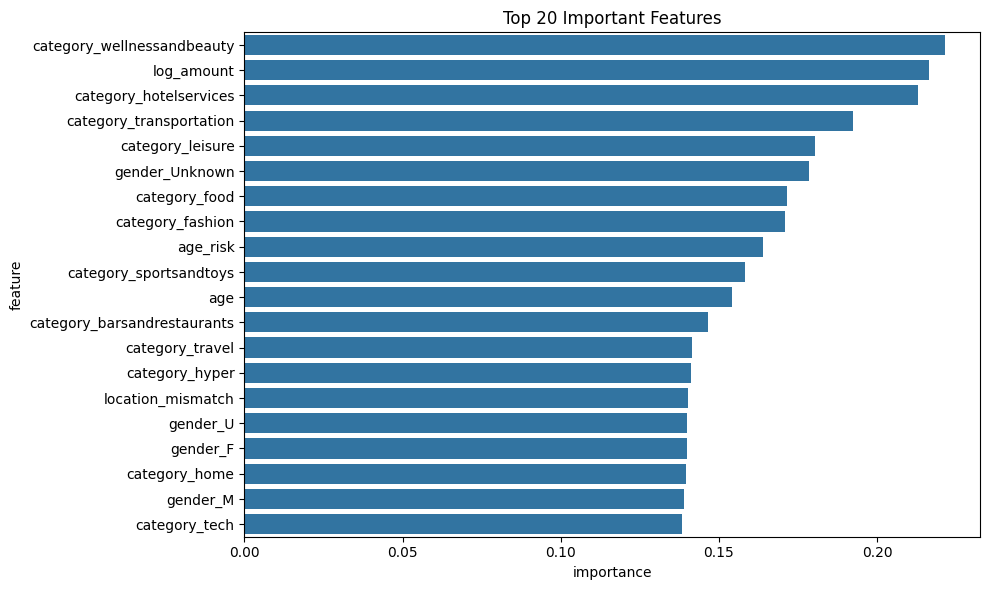

In [150]:
# Feature Importance (modified for PyTorch)
def plot_feature_importance():
    # Get feature names (same as original)
    num_features = ['log_amount', 'age']
    cat_features = transaction_pipeline.named_transformers_['cat'].get_feature_names_out(['gender', 'category'])
    bin_features = ['location_mismatch', 'is_night']
    new_features = ['age_risk', 'merchant_age_risk'] if 'age_risk' in df.columns else []
    feature_names = np.concatenate([num_features, cat_features, bin_features, new_features])
    
    # Get weights from first dense layer after concatenation
    weights = model.classifier[0].weight.detach().numpy()
    importance = np.mean(np.abs(weights), axis=0)[:len(feature_names)]
    
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df.head(20))
    plt.title('Top 20 Important Features')
    plt.tight_layout()
    plt.show()

plot_feature_importance()